# Data Analysis
In this notebook, we'll import, analyze and prepare the required financial data for the upcoming estimation of different asset pricing models.

## 1. Necessary Imports

In [1]:
# Import basic modules
import numpy as np
import pandas as pd
import datetime as dt
import warnings

In [2]:
# Prevent warnings from being shown
warnings.filterwarnings("ignore")

In [3]:
# Function for importing financial data from yahoo-finance
from pandas_datareader import data as pdr
def get_data(assets, start, end, feature):
    data = pdr.get_data_yahoo(assets, start = start, end = end)
    data = data[feature]
    return data

### 1.1 Stocks and Market Data
We will be working with a portfolio consisting of the following five stocks: Nvidia (NVDA), Procter & Gamble (PG), Pfizer (PFE), PepsiCo (PEP) and Bank of America (BAC), providing a wide range of different industries. We'll use the S&P500 index as our market proxy. The chosen time period ranges from 2002 to 2022, providing 5031 initial observations. Simple returns are computed as follows: $$R_{t}=\frac{P_{t}}{P_{t-1}}-1.$$

In [4]:
# Stock selection: Nvidia, Procter & Gamble, Pfizer, PepsiCo and Bank of America
# Using S&P500 as market proxy
data_list = ["NVDA", "PG", "PFE", "PEP", "BAC", "^GSPC"]

In [5]:
# Set start and end date for data collection
# Selecting 20 years of data
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days = 365 * 20)

In [6]:
# Download data and store in dataframe
df = get_data(data_list, start_date, end_date, "Adj Close")
print(df.head(10))

Symbols         NVDA         PG        PFE        PEP        BAC       ^GSPC
Date                                                                        
2002-07-22  1.323059  22.822050  11.752464  21.111658  18.728403  819.849976
2002-07-23  1.224346  23.226702  11.811407  21.391174  17.991955  797.700012
2002-07-24  1.302398  24.118122  12.645691  23.520174  18.333771  843.429993
2002-07-25  1.152416  24.930376  12.727307  24.037563  18.628979  838.679993
2002-07-26  1.125634  24.689917  13.357549  23.906725  19.157232  852.840027
2002-07-29  1.157008  25.575470  13.987796  25.298311  19.980705  898.960022
2002-07-30  1.241182  25.593058  14.132881  24.822559  19.974491  902.780029
2002-07-31  0.847095  26.094496  14.667913  25.536198  20.664339  911.619995
2002-08-01  0.765982  25.766079  14.282515  25.274527  20.136074  884.659973
2002-08-02  0.715478  26.343739  14.010464  25.542135  19.735214  864.239990


In [7]:
# Compute simple returns
returns = df.pct_change().dropna()
print(returns.head(10))

Symbols         NVDA        PG       PFE       PEP       BAC     ^GSPC
Date                                                                  
2002-07-23 -0.074610  0.017731  0.005015  0.013240 -0.039323 -0.027017
2002-07-24  0.063750  0.038379  0.070634  0.099527  0.018998  0.057327
2002-07-25 -0.115159  0.033678  0.006454  0.021998  0.016102 -0.005632
2002-07-26 -0.023240 -0.009645  0.049519 -0.005443  0.028357  0.016884
2002-07-29  0.027872  0.035867  0.047183  0.058209  0.042985  0.054078
2002-07-30  0.072752  0.000688  0.010372 -0.018806 -0.000311  0.004249
2002-07-31 -0.317510  0.019593  0.037857  0.028750  0.034536  0.009792
2002-08-01 -0.095754 -0.012586 -0.026275 -0.010247 -0.025564 -0.029574
2002-08-02 -0.065934  0.022419 -0.019048  0.010588 -0.019908 -0.023082
2002-08-05 -0.080214 -0.020481 -0.037217 -0.046799 -0.022831 -0.034296


### 1.2 Factor Data
We want to assess the explanatory power of the following five factors: SMB, HML, RMW, CMA and Rm-Rf. These factors are known as the Fama/French 5 research factors used for estimating the famous Fama/French 3- and 5-Factor asset pricing models:
- SMB (Small Minus Big) is the average return on nine small stock portfolios minus the average return on nine big stock portfolios.
- HML (High Minus Low) is the average return on two value portfolios minus the average return on two growth portfolios.
- RMW (Robust Minus Weak) is the average return on two robust operating profitability portfolios minus the average return on two weak operating profitability portfolios.
- CMA (Conservative Minus Aggressive) is the average return on two conservative investment portfolios minus the average return on two aggressive investment portfolios.
- Rm-Rf is the excess return on the market, using the return of all CRSP firms incorporated in the US and listed on the NYSE, AMEX, or NASDAQ minus the one-month treasury bill rate.

In [8]:
# Downloading the fama & french 5 research factors from their database
from pandas_datareader.famafrench import get_available_datasets
ff = pdr.DataReader("F-F_Research_Data_5_Factors_2x3_daily", "famafrench", start = "2002-07-16")[0] / 100
print(ff.head(10))

            Mkt-RF     SMB     HML     RMW     CMA       RF
Date                                                       
2002-07-16 -0.0150  0.0118 -0.0083 -0.0098 -0.0042  0.00007
2002-07-17  0.0063 -0.0006 -0.0022 -0.0041 -0.0013  0.00007
2002-07-18 -0.0270 -0.0025  0.0067  0.0044  0.0040  0.00007
2002-07-19 -0.0338  0.0096  0.0024 -0.0070 -0.0051  0.00007
2002-07-22 -0.0318  0.0144  0.0039 -0.0033 -0.0006  0.00007
2002-07-23 -0.0286 -0.0059 -0.0211  0.0241 -0.0010  0.00007
2002-07-24  0.0543 -0.0181 -0.0185  0.0144 -0.0043  0.00007
2002-07-25 -0.0052  0.0056 -0.0037  0.0327 -0.0059  0.00007
2002-07-26  0.0149 -0.0067  0.0052  0.0045 -0.0072  0.00007
2002-07-29  0.0539 -0.0115  0.0003 -0.0128 -0.0020  0.00007


## 2. Descriptive Statistics

### 2.1 Stocks
- 5031 observations (days)
- Mean returns of approximately 0 for all stocks
- Highest daily volatility for NVDA stock, approximately 3,2%
- Highest daily max drawdown for NVDA stock with 35,2%
- Highest daily max return for BAC stock with 35,2%
- Lowest daily volatility for PG stock, approximately 1,1%
- Lowest daily max drawdown for PG stock with 8,7%
- Lowest daily max return for PFE stock with 10,8%

In [9]:
print(returns.describe())

Symbols         NVDA           PG          PFE          PEP          BAC  \
count    5031.000000  5031.000000  5031.000000  5031.000000  5031.000000   
mean        0.001494     0.000432     0.000406     0.000486     0.000528   
std         0.032820     0.011364     0.014916     0.011874     0.029070   
min        -0.352335    -0.087373    -0.111456    -0.119314    -0.289694   
25%        -0.014241    -0.004927    -0.006889    -0.005108    -0.009232   
50%         0.001372     0.000438     0.000000     0.000354     0.000355   
75%         0.016451     0.005940     0.007577     0.006055     0.010016   
max         0.330636     0.120090     0.108552     0.148687     0.352691   

Symbols        ^GSPC  
count    5031.000000  
mean        0.000384  
std         0.012283  
min        -0.119841  
25%        -0.004223  
50%         0.000712  
75%         0.005720  
max         0.115800  


### 2.2 Factors
- 5005 observations (days)
- Mean returns of approximately 0 for all factors
- Highest daily volatility for excess market returns, approximately 1,2%
- Highest daily max drawdown for market return with 12%
- Highest daily max return for market with 11,3%
- Lowest daily volatility for RF, approximately 0,0059%
- Lowest daily max drawdown for RF with 0%
- Lowest daily max return for RF with 0,02%

In [10]:
print(ff.describe())

            Mkt-RF          SMB          HML          RMW          CMA  \
count  5005.000000  5005.000000  5005.000000  5005.000000  5005.000000   
mean      0.000421     0.000055     0.000019     0.000120     0.000057   
std       0.012356     0.006166     0.007591     0.004532     0.003460   
min      -0.120000    -0.045200    -0.049600    -0.027200    -0.023000   
25%      -0.004400    -0.003500    -0.003100    -0.002300    -0.001800   
50%       0.000800     0.000000    -0.000100     0.000000     0.000000   
75%       0.006000     0.003600     0.002800     0.002400     0.001800   
max       0.113500     0.057300     0.067500     0.042000     0.024600   

                RF  
count  5005.000000  
mean      0.000045  
std       0.000059  
min       0.000000  
25%       0.000000  
50%       0.000010  
75%       0.000070  
max       0.000220  


## 3. Data Exploration

In [11]:
# Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from matplotlib.pyplot import plot

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [12]:
import scipy.stats as stats
# Function for visualization of stock returns
def plot_stocks(asset):
    fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))
    
    ax[1, 0].plot(asset, color = "blue")
    ax[1, 0].set_title("Simple returns over time")
         
    sns.histplot(asset, ax = ax[0,0], bins = 250, color = "lightcyan", stat = "density")
    sns.kdeplot(asset, ax = ax[0,0], color = "blue", linestyle = "--", label = "Density")
    
    mean, std = stats.norm.fit(asset)
    x = np.linspace(-0.3, 0.3, 300)
    p = stats.norm.pdf(x, mean, std)
    ax[0,0].plot(x, p, "r", linewidth = 2, label = "Normal")
    ax[0, 0].set_xlim(-0.1, 0.1)
    ax[0,0].legend()
    ax[0,0].set_title("Distribution of simple returns")
    
    lineprops = {"color" : "black", "linewidth" : 1}
    flierprops = {"markerfacecolor" : "blue", "marker" : "o", "markeredgecolor" : "blue"}
    boxplot_kwargs = {"medianprops" : lineprops, "whiskerprops" : lineprops, 
                      "capprops" : lineprops, "flierprops" : flierprops,  
                      "boxprops" :{"edgecolor" : "black", "linewidth" : 1}}
    
    sns.boxplot(asset, ax = ax[0,1], color = "lightcyan", saturation = 1, **boxplot_kwargs)
    ax[0,1].set_title("Boxplot of simple returns")
    
    stats.probplot(asset, dist = "norm", rvalue = True, fit = True, plot = plt)
    plt.tight_layout()

In [13]:
# Function for visualization of factor returns
def plot_factors(asset):
    fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))
    
    ax[1, 0].plot(asset, color = "blue")
    ax[1, 0].set_title("Factor returns over time")
         
    sns.histplot(asset, ax = ax[0,0], bins = 250, color = "lightcyan", stat = "density")
    sns.kdeplot(asset, ax = ax[0,0], color = "blue", linestyle = "--", label = "Density")
    
    mean, std = stats.norm.fit(asset)
    x = np.linspace(-0.3, 0.3, 300)
    p = stats.norm.pdf(x, mean, std)
    ax[0,0].plot(x, p, "r", linewidth = 2, label = "Normal")
    ax[0, 0].set_xlim(-0.05, 0.05)
    ax[0,0].legend()
    ax[0,0].set_title("Distribution of factor returns")
    
    lineprops = {"color" : "black", "linewidth" : 1}
    flierprops = {"markerfacecolor" : "blue", "marker" : "o", "markeredgecolor" : "blue"}
    boxplot_kwargs = {"medianprops" : lineprops, "whiskerprops" : lineprops, 
                      "capprops" : lineprops, "flierprops" : flierprops,  
                      "boxprops" :{"edgecolor" : "black", "linewidth" : 1}}
    
    sns.boxplot(asset, ax = ax[0,1], color = "lightcyan", saturation = 1, **boxplot_kwargs)
    ax[0,1].set_title("Boxplot of factor returns")
    
    stats.probplot(asset, dist = "norm", rvalue = True, fit = True, plot = plt)
    plt.tight_layout()

In addition to visualizing the data, we want to conduct hypothesis tests assessing the distribution of the data. We'll check each of the assets and factors for skewness and kurtosis and compare them with a normal distribution. Skewness and kurtosis can be defined as follows:
$$ Skewness = S = \frac{1}{T}\sum^T_{t=1}\frac{(R_{t}-\bar{R})^3}{s^3}, \;\;\; Kurtosis = K = \frac{1}{T}\sum^T_{t=1}\frac{(R_{t}-\bar{R})^4}{s^4}. $$
Where $\bar{R}$ is the arithmetic mean of the respective asset and $s$ being volatility measured by the standard deviation. Recall that a normal distribution has a skewness of 0 and a kurtosis of 3, we can test for normal distribution by using the so called Jarque-Bera Test with the following test statistic:
$$ JB = \frac{T}{6}\left[S^2 + \frac{1}{4}(K-3)^2\right]. $$
The null hypothesis $H_{0}$ of the Jarque-Bera test states that the data follows a normal distribution.

In [14]:
# Function for calculation of hypothesis tests
# Jarque-Bera Test with H0: the data follows a normal distribution
from statsmodels.stats.stattools import jarque_bera
def normal_test(asset):
    print("Skewness: " + str(stats.skew(asset)))
    print("Kurtosis: " + str(stats.kurtosis(asset)))
    print("P-Value for JB-Test = " + str(round(jarque_bera(asset)[1], 2)))

### 3.1 Stocks

#### 3.1.1 Nvidia Stock Returns (2002-2022)

In [15]:
normal_test(returns["NVDA"])

Skewness: -0.07464052028857894
Kurtosis: 12.866953371162378
P-Value for JB-Test = 0.0


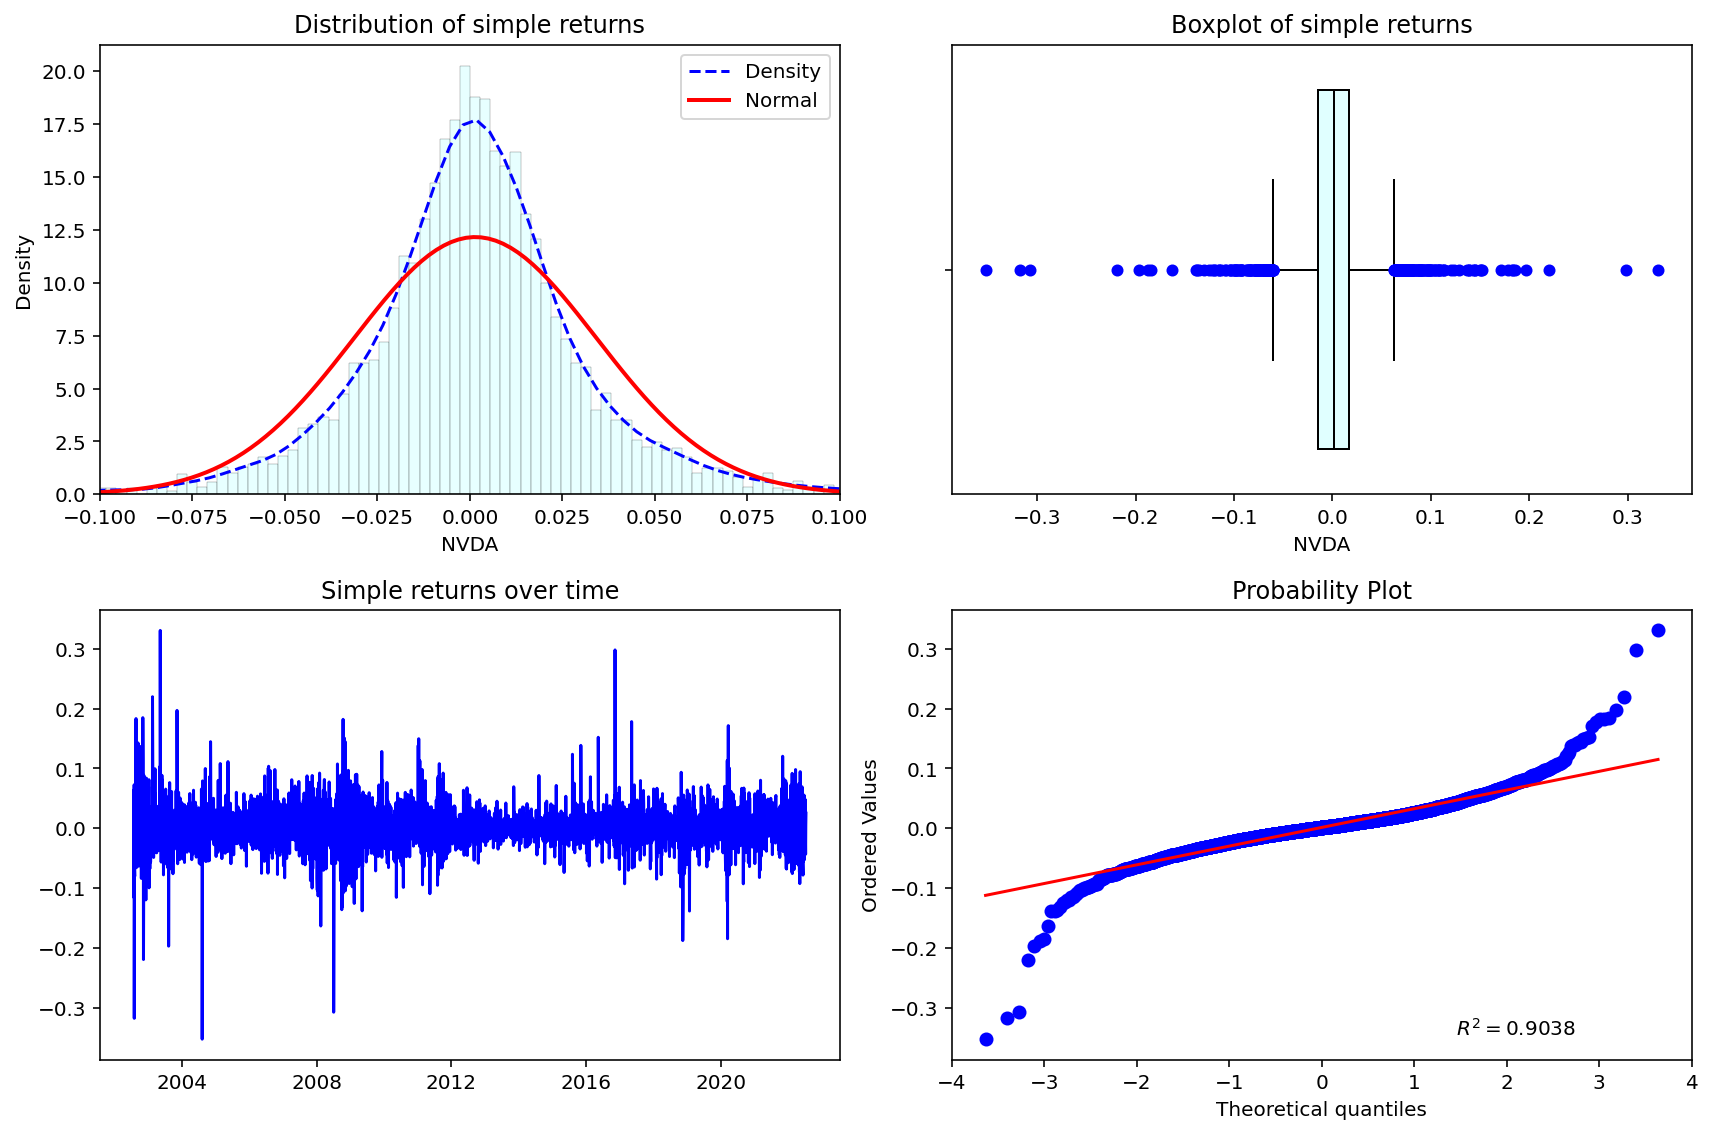

In [16]:
plot_stocks(returns["NVDA"])

#### 3.1.2 Procter & Gamble Stock Returns (2002-2022)

In [17]:
normal_test(returns["PG"])

Skewness: 0.16333459329231934
Kurtosis: 10.228200078129886
P-Value for JB-Test = 0.0


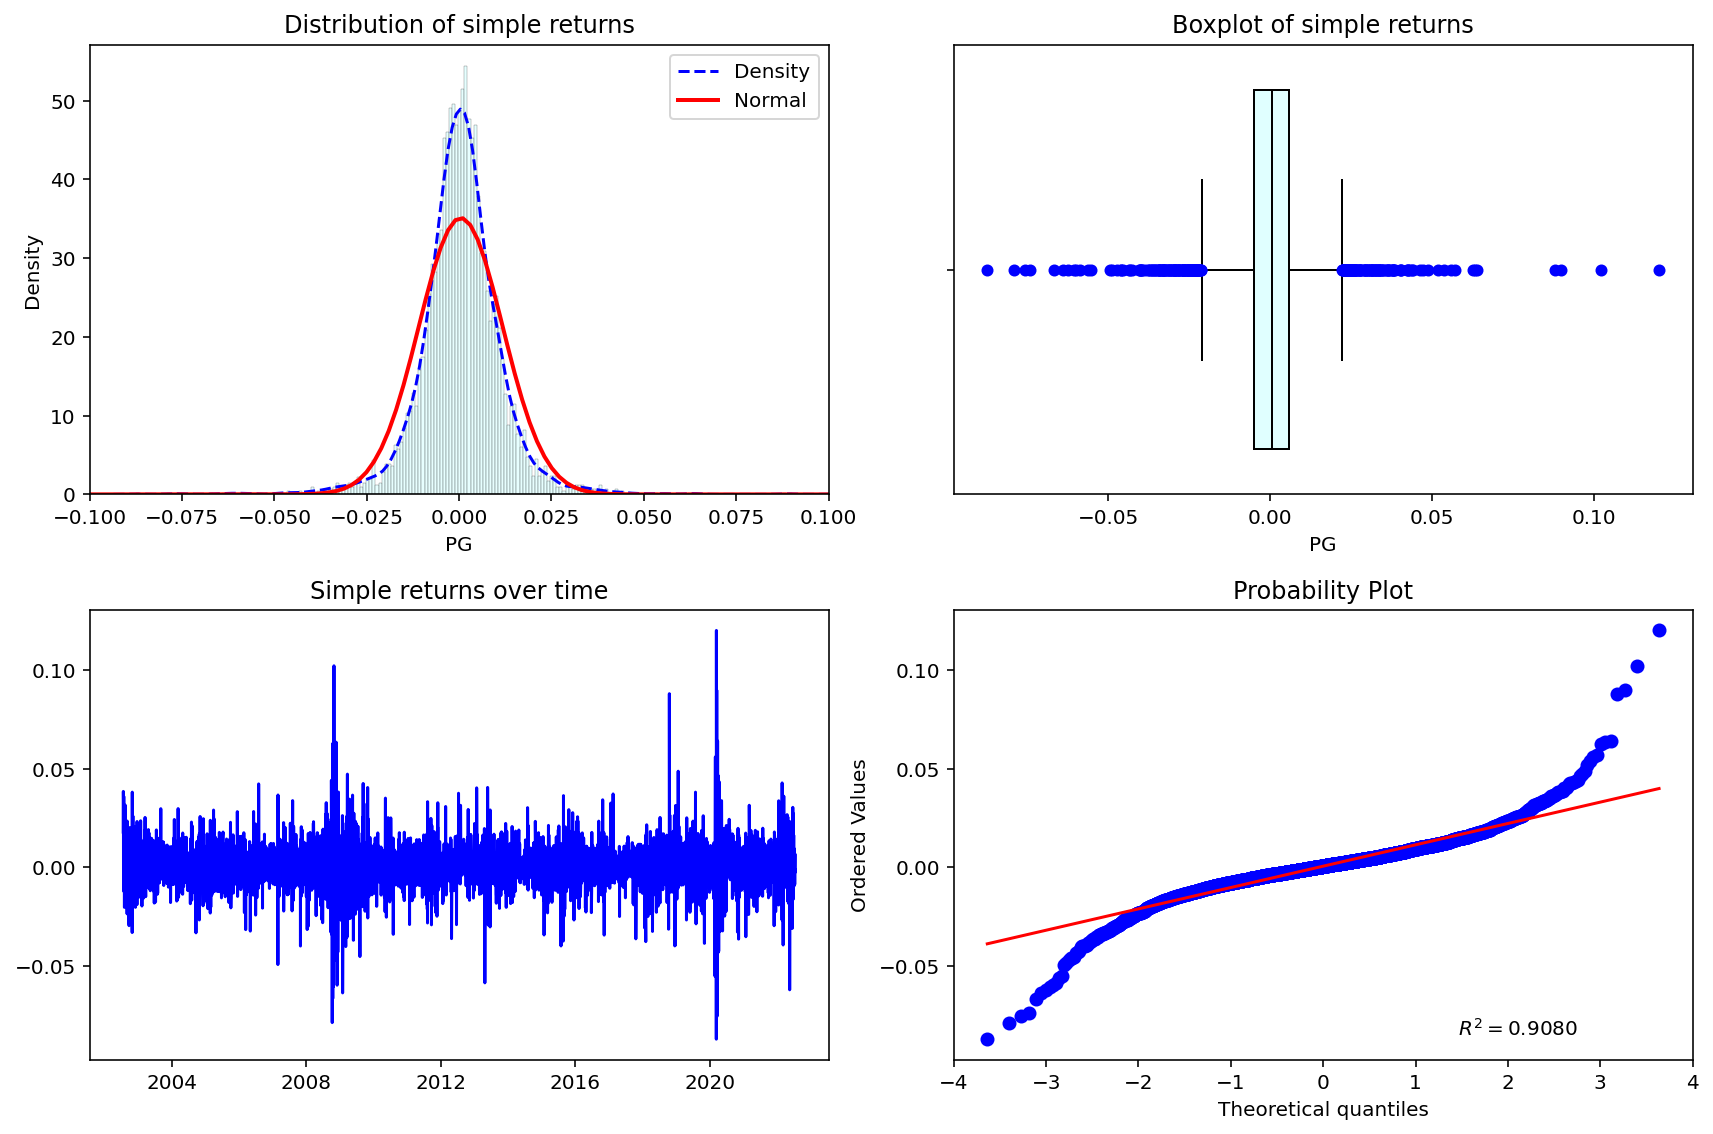

In [18]:
plot_stocks(returns["PG"])

#### 3.1.3 Pfizer Stock Returns (2002-2022)

In [19]:
normal_test(returns["PFE"])

Skewness: 0.08497678253550756
Kurtosis: 6.2743008866273
P-Value for JB-Test = 0.0


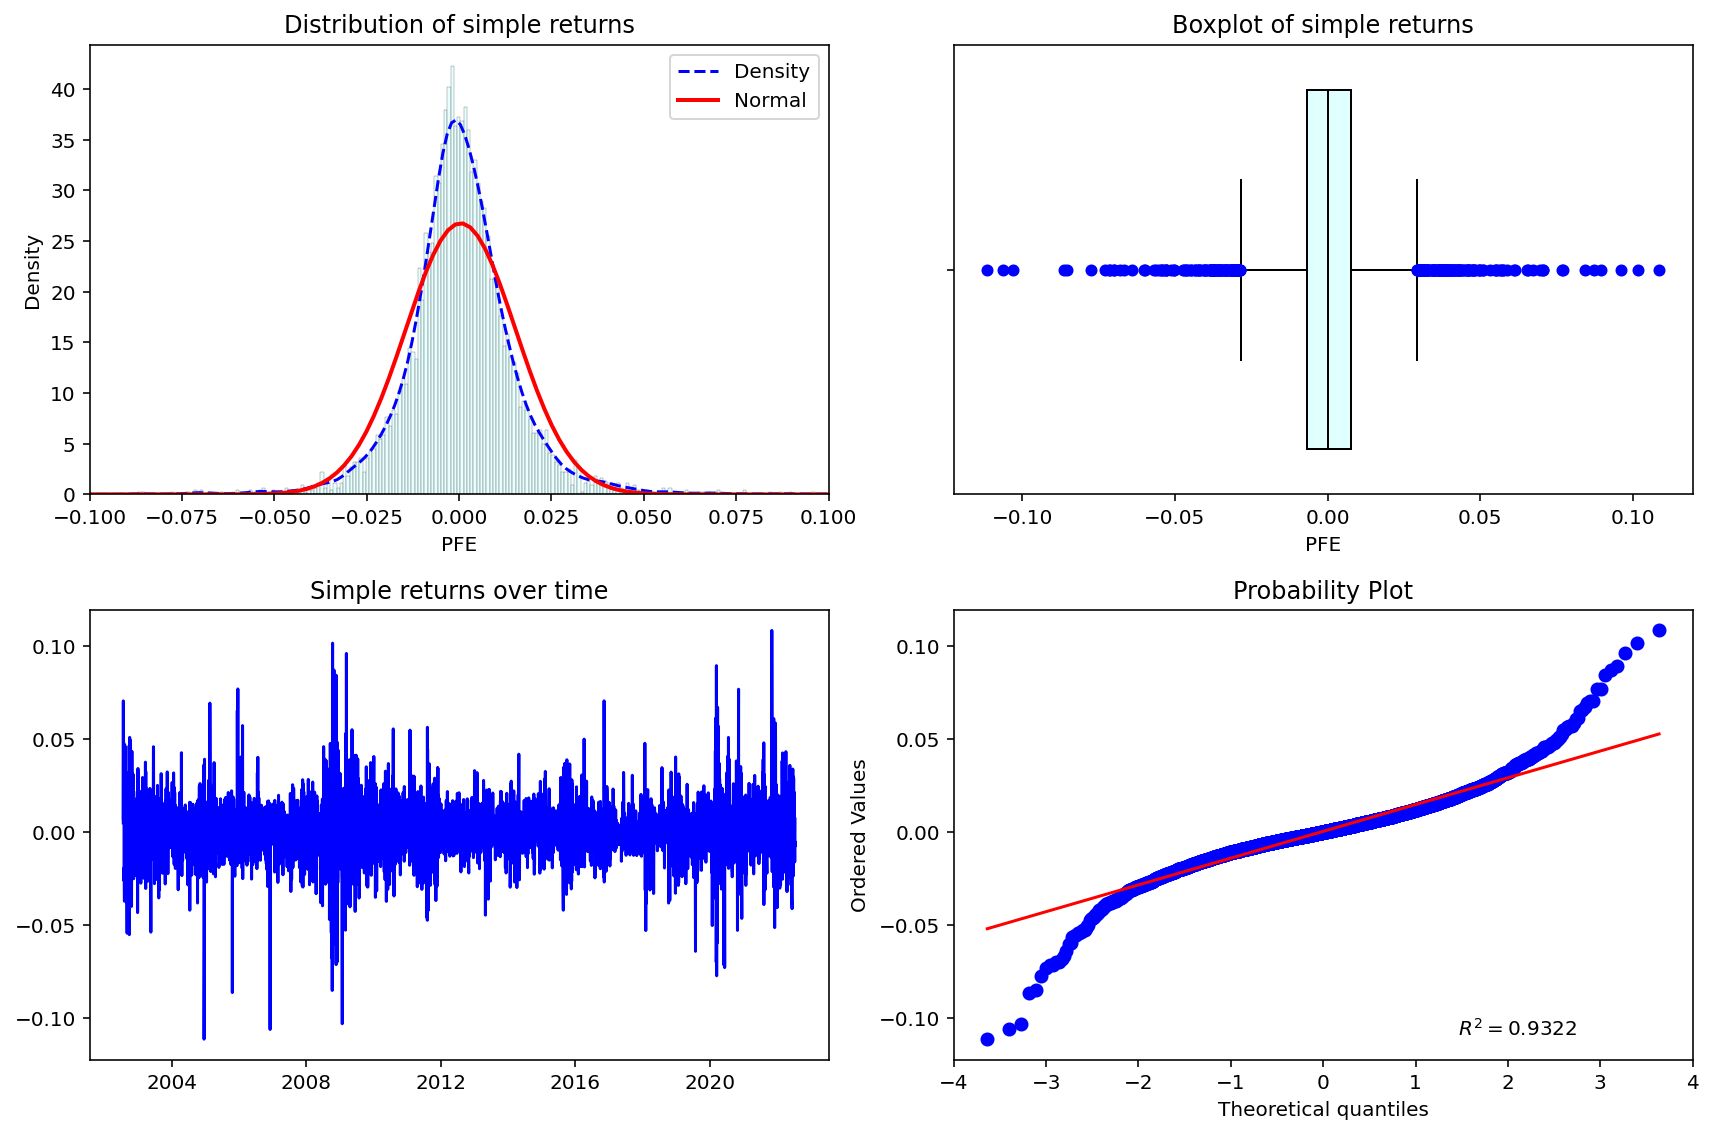

In [20]:
plot_stocks(returns["PFE"])

#### 3.1.4 PepsiCo Stock Returns (2002-2022)

In [21]:
normal_test(returns["PEP"])

Skewness: 0.39896445640844047
Kurtosis: 19.975348533817275
P-Value for JB-Test = 0.0


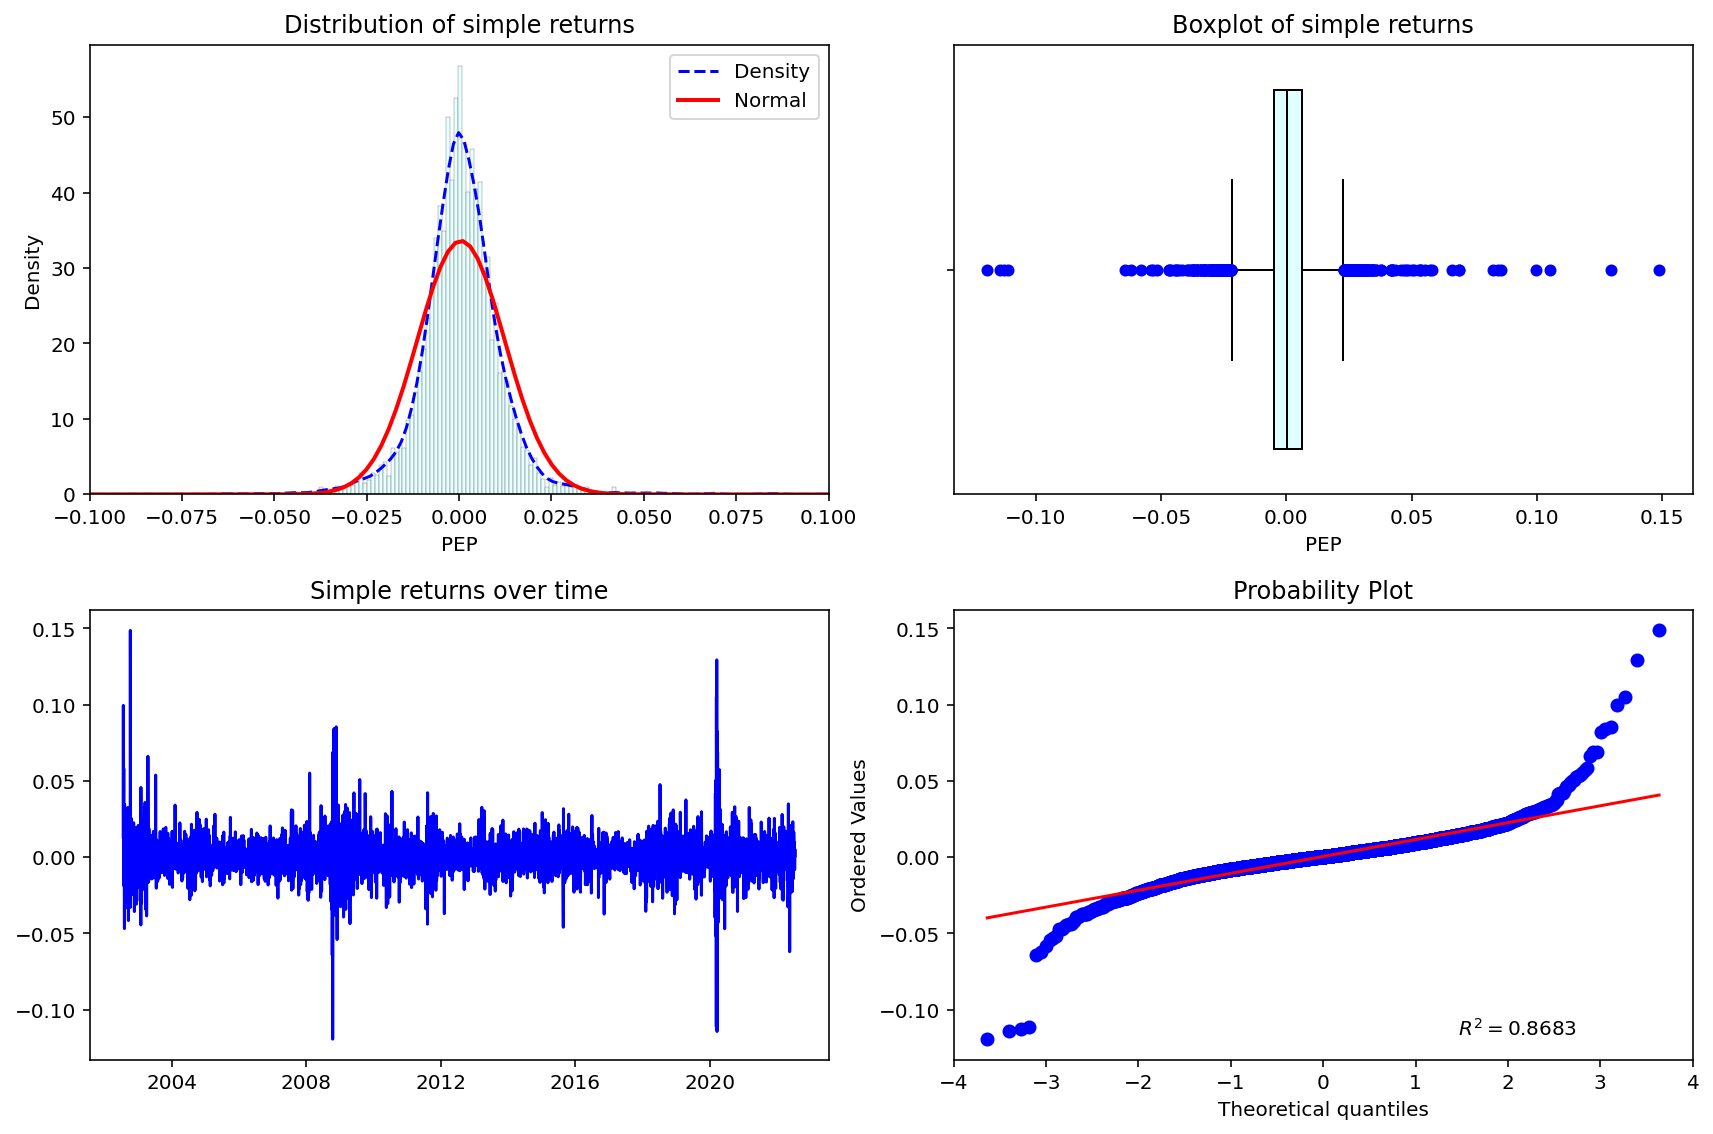

In [22]:
plot_stocks(returns["PEP"])

#### 3.1.5 Bank of America Stock Returns (2002-2022)

In [23]:
normal_test(returns["BAC"])

Skewness: 0.9081588468165502
Kurtosis: 27.667553813116186
P-Value for JB-Test = 0.0


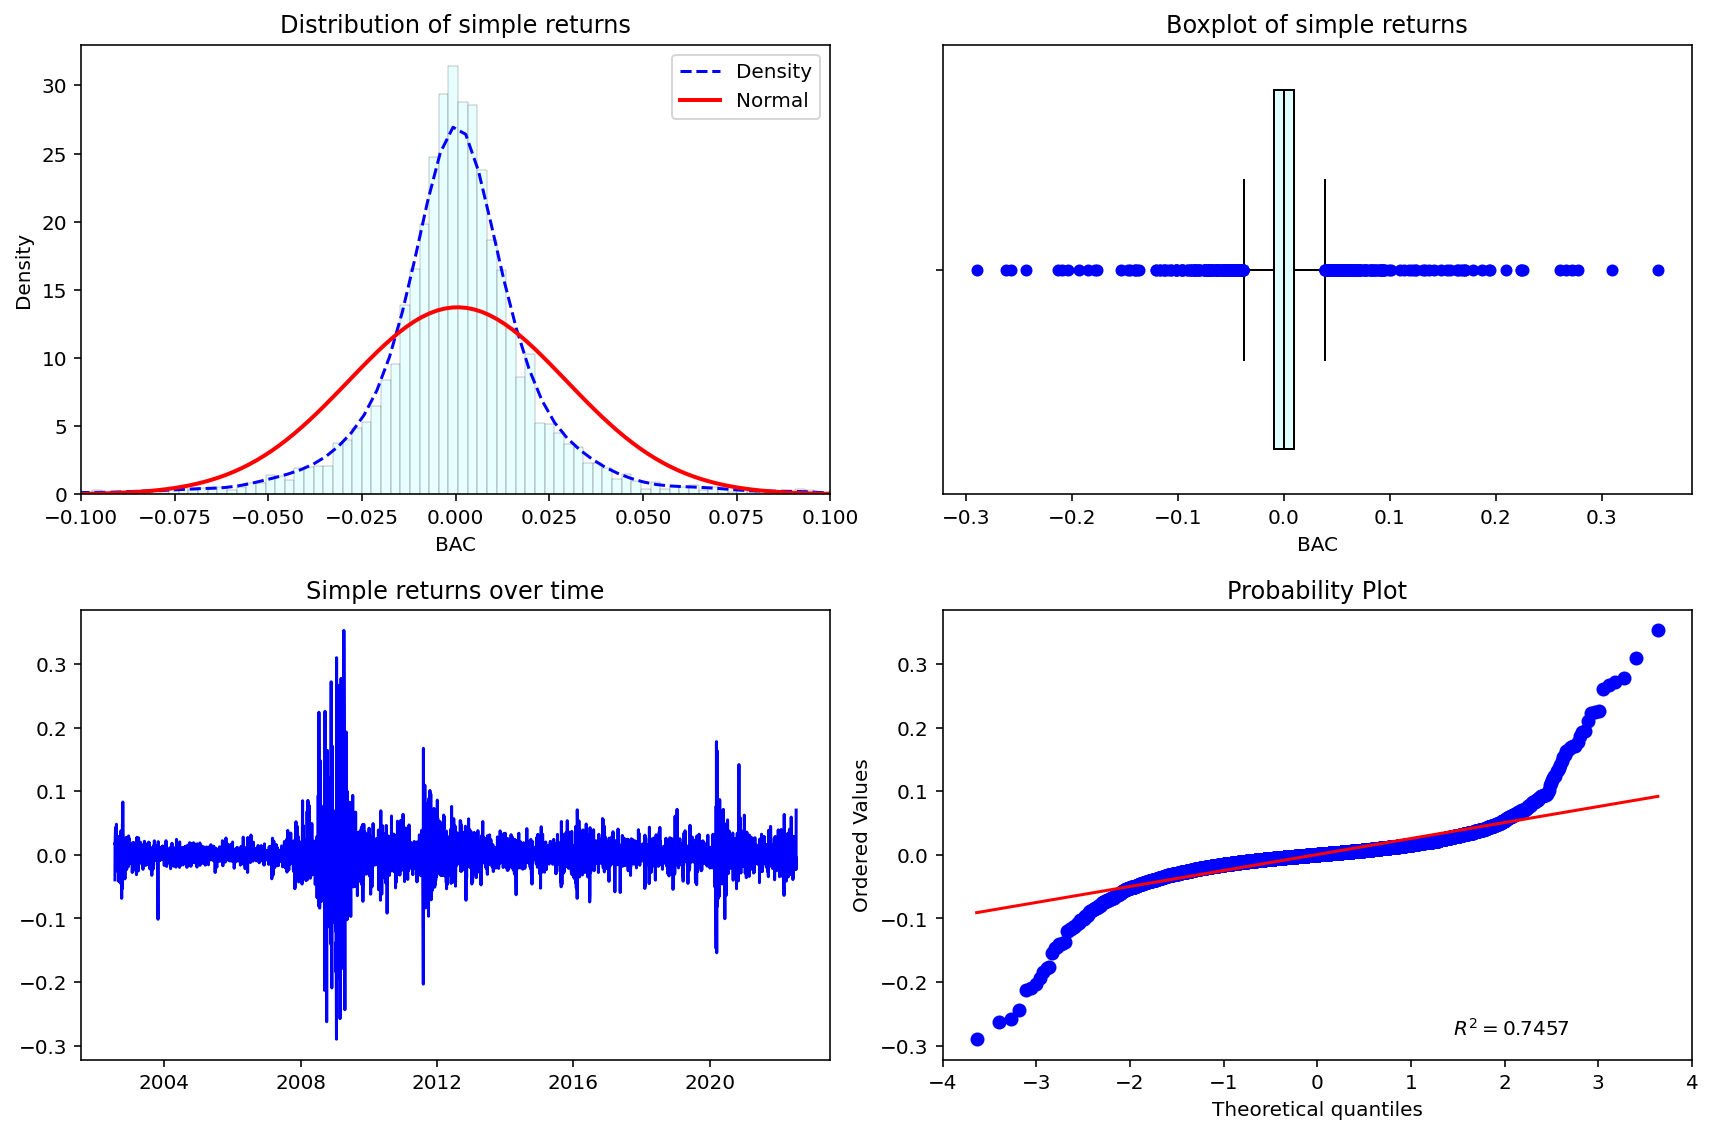

In [24]:
plot_stocks(returns["BAC"])

### 3.2 Factors

#### 3.2.1 Excess Market Returns (2002-2022)

In [25]:
normal_test(ff["Mkt-RF"])

Skewness: -0.2788004015517123
Kurtosis: 10.913720703757079
P-Value for JB-Test = 0.0


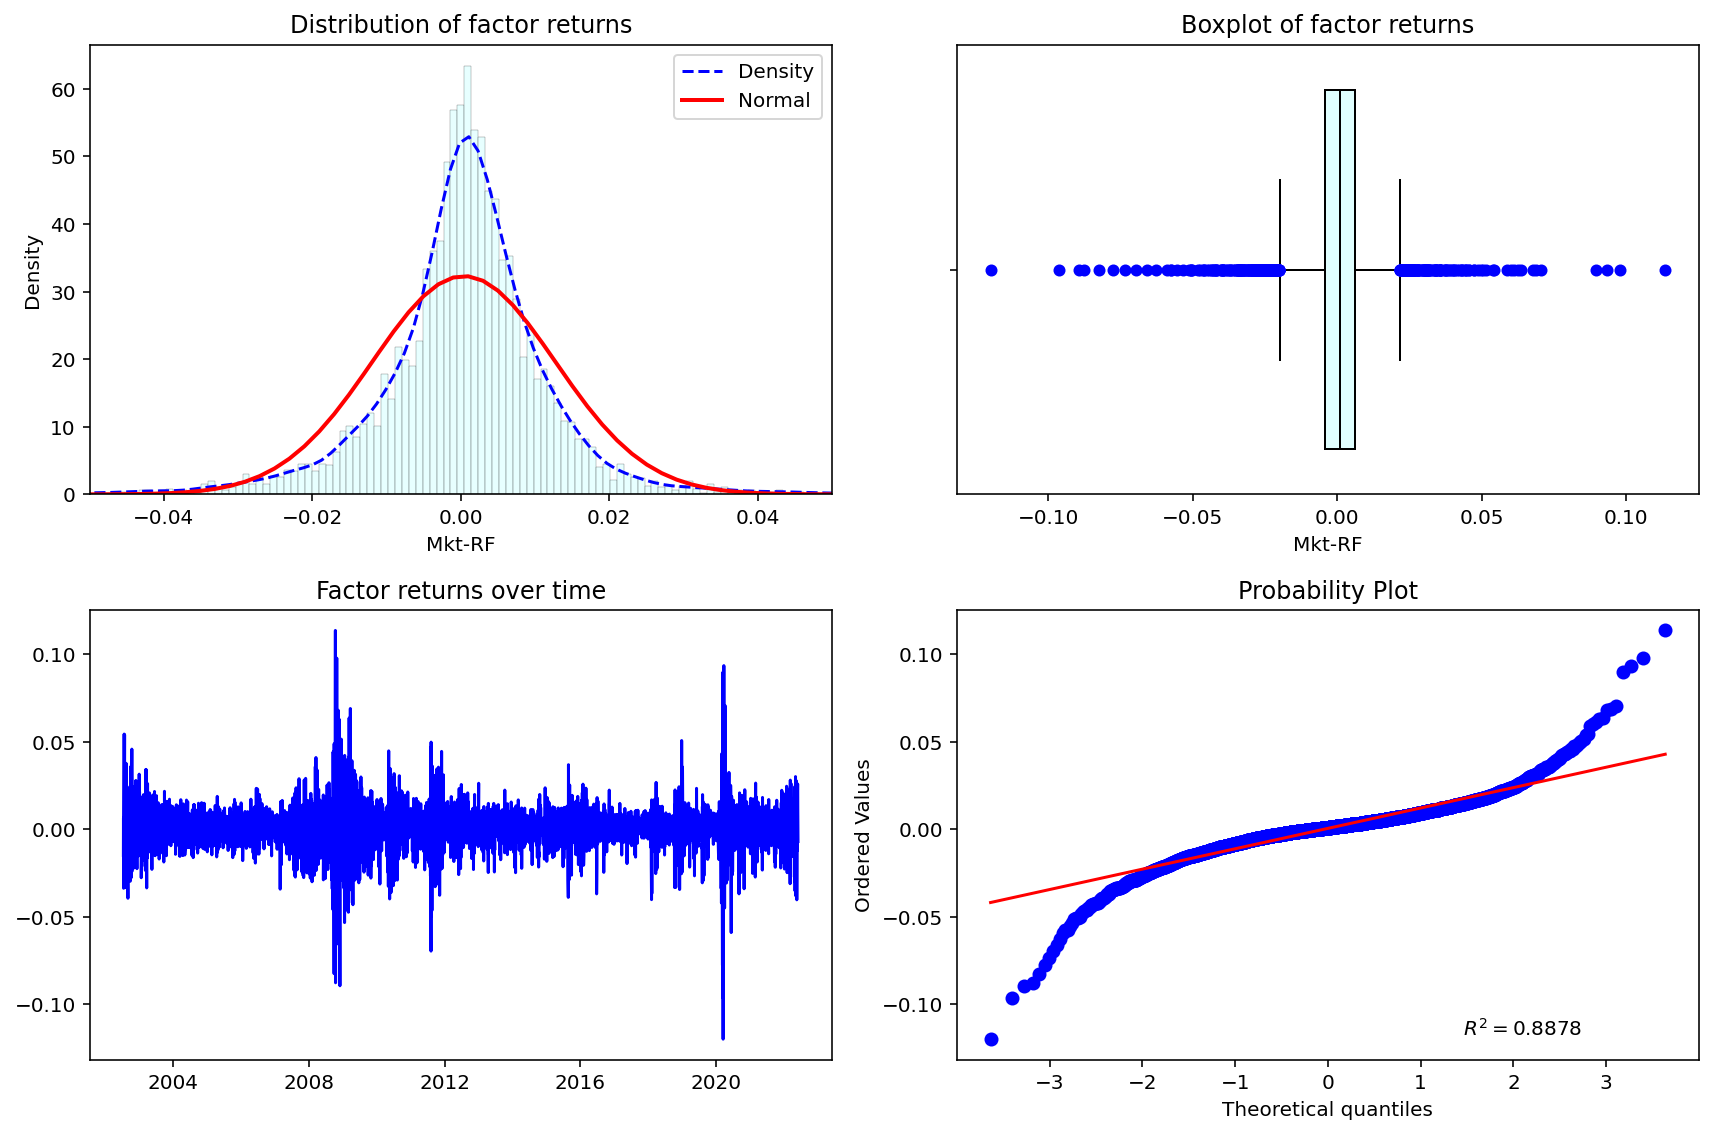

In [26]:
plot_factors(ff["Mkt-RF"])

#### 3.2.2 Small Minus Big (2002-2022)

In [27]:
normal_test(ff["SMB"])

Skewness: 0.17665068076865395
Kurtosis: 4.478594991989025
P-Value for JB-Test = 0.0


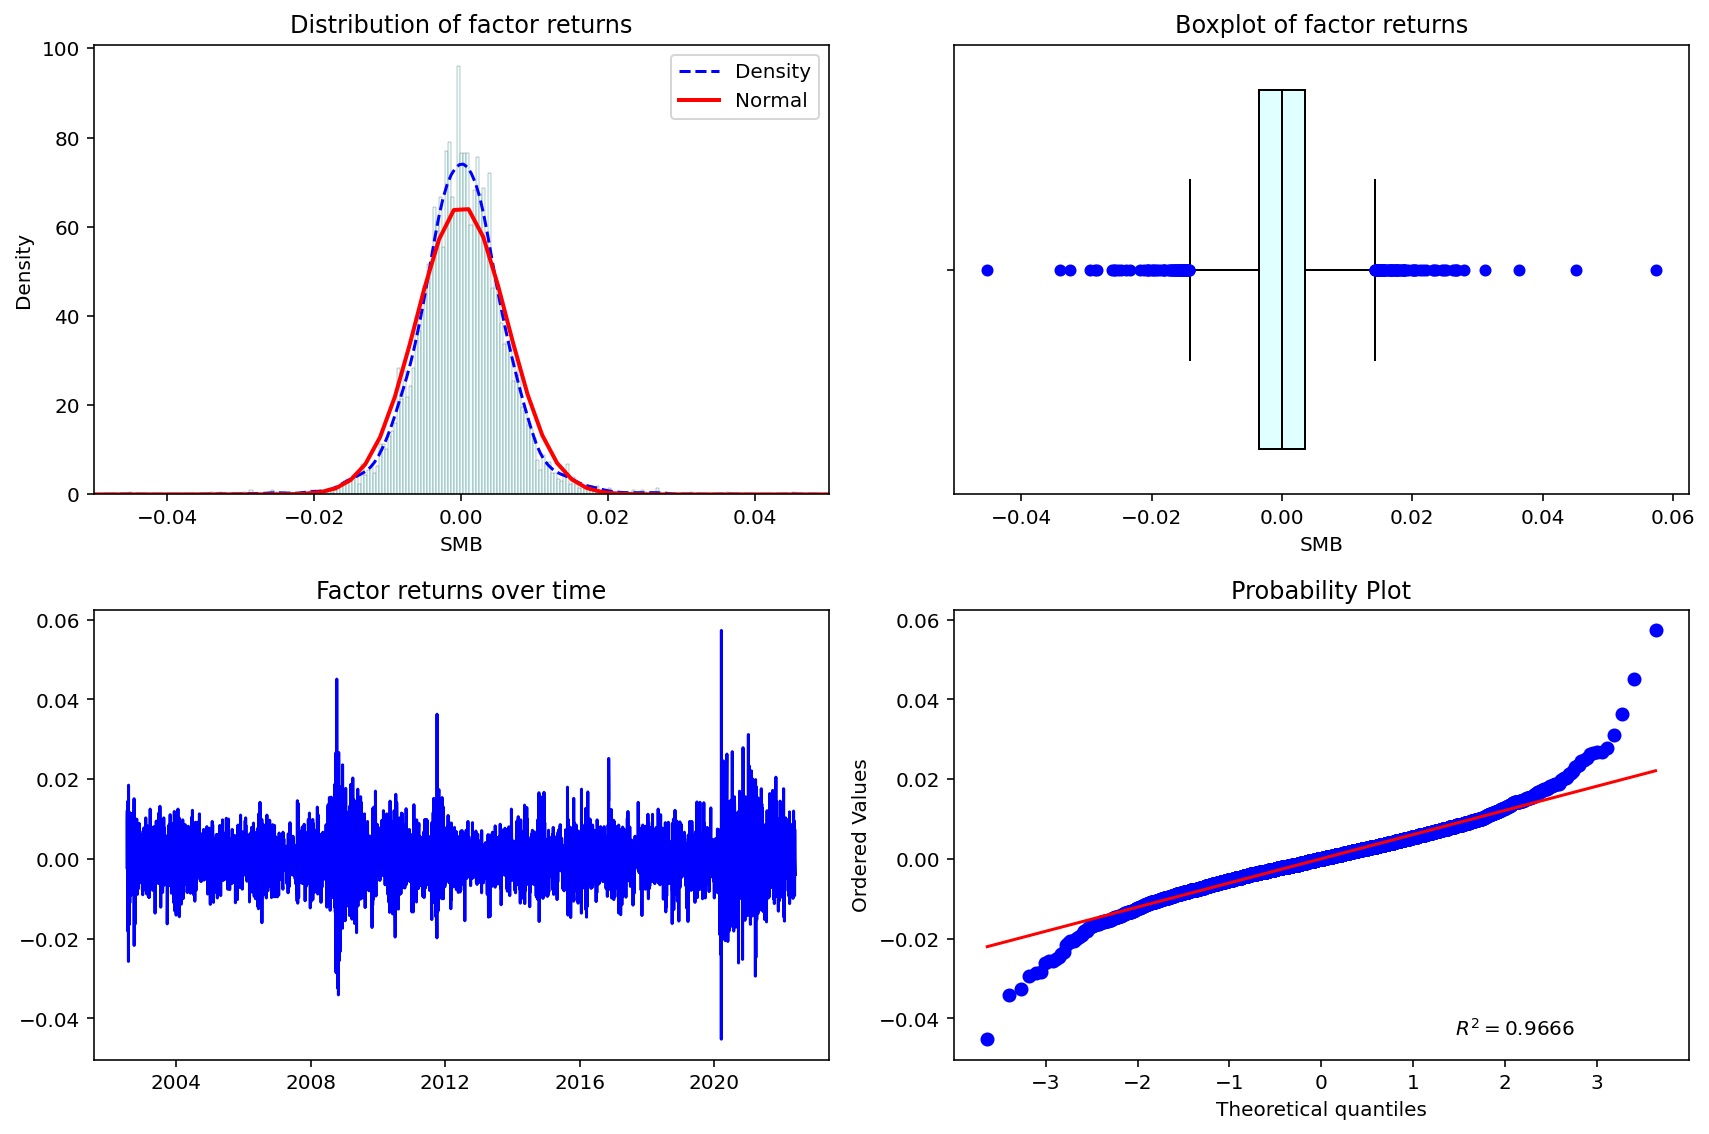

In [28]:
plot_factors(ff["SMB"])

#### 3.2.3 High Minus Low (2002-2022)

In [29]:
normal_test(ff["HML"])

Skewness: 0.45751686077428516
Kurtosis: 8.810471377117128
P-Value for JB-Test = 0.0


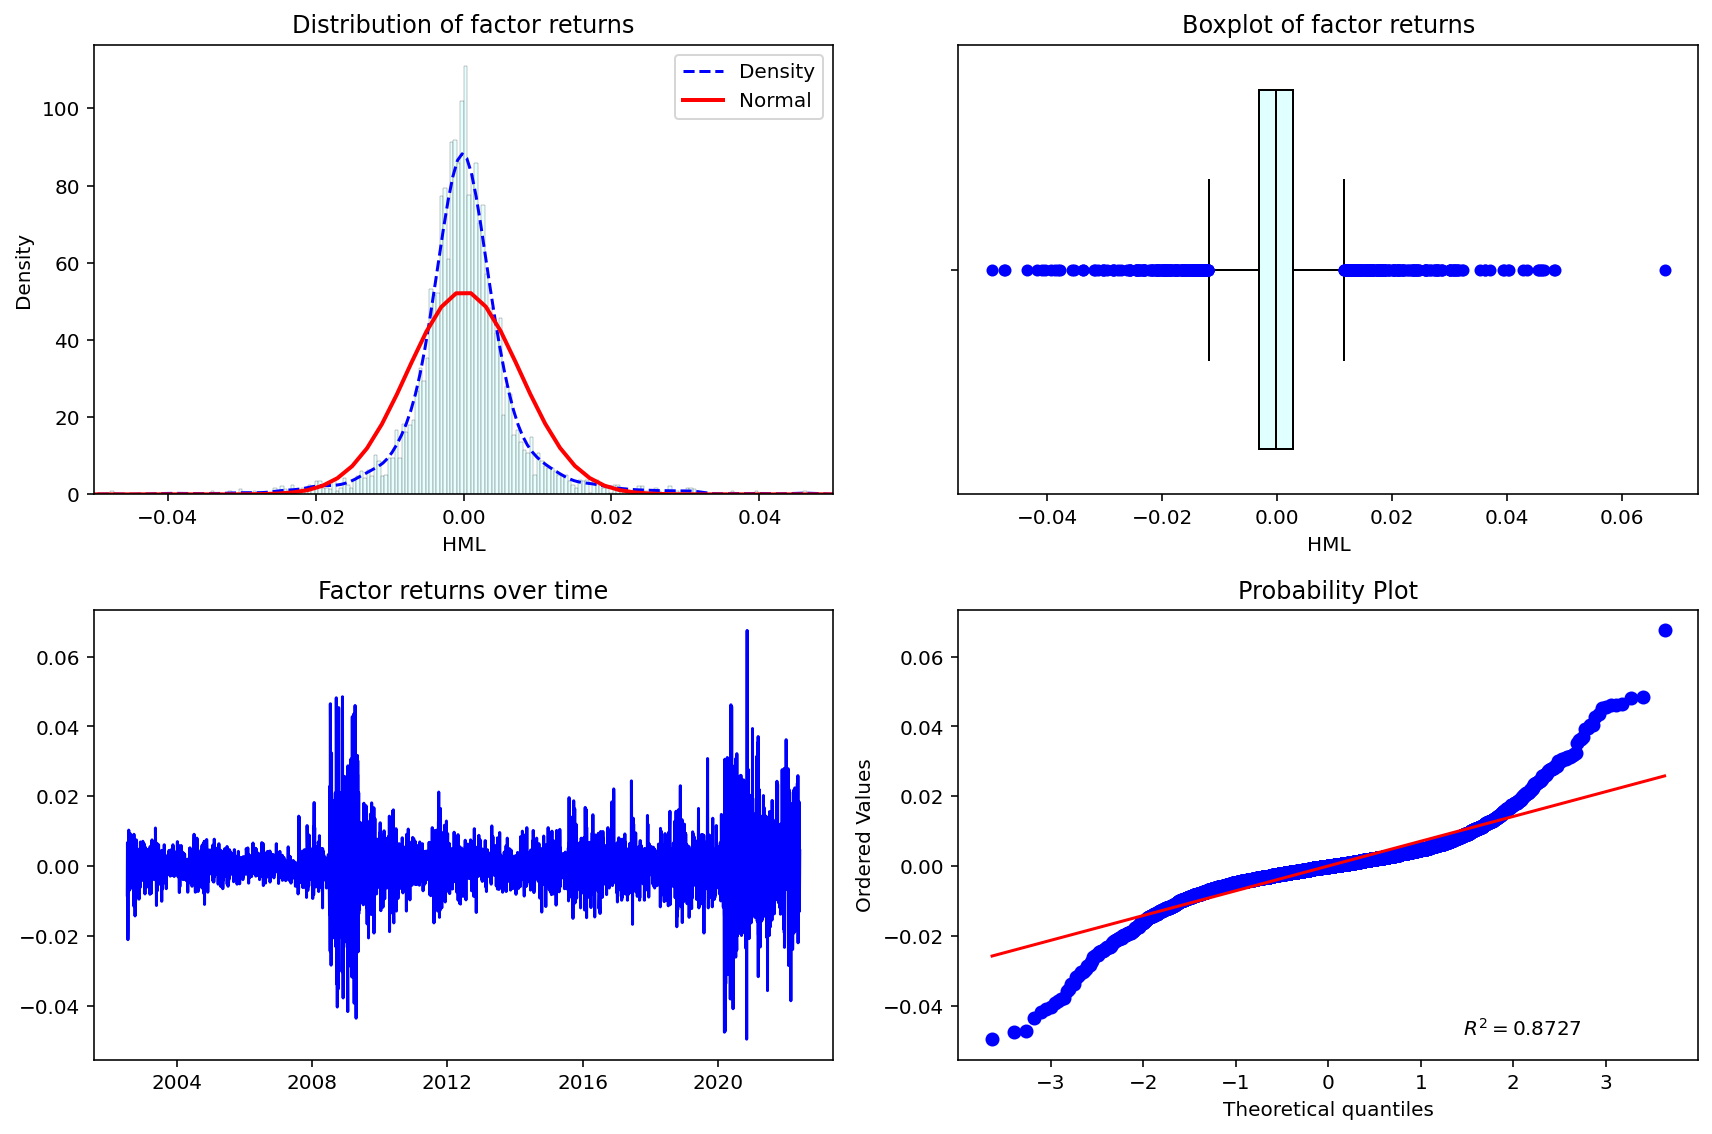

In [30]:
plot_factors(ff["HML"])

#### 3.2.4 Robust Minus Weak (2002-2022)

In [31]:
normal_test(ff["RMW"])

Skewness: 0.24579587280149476
Kurtosis: 4.191916403863523
P-Value for JB-Test = 0.0


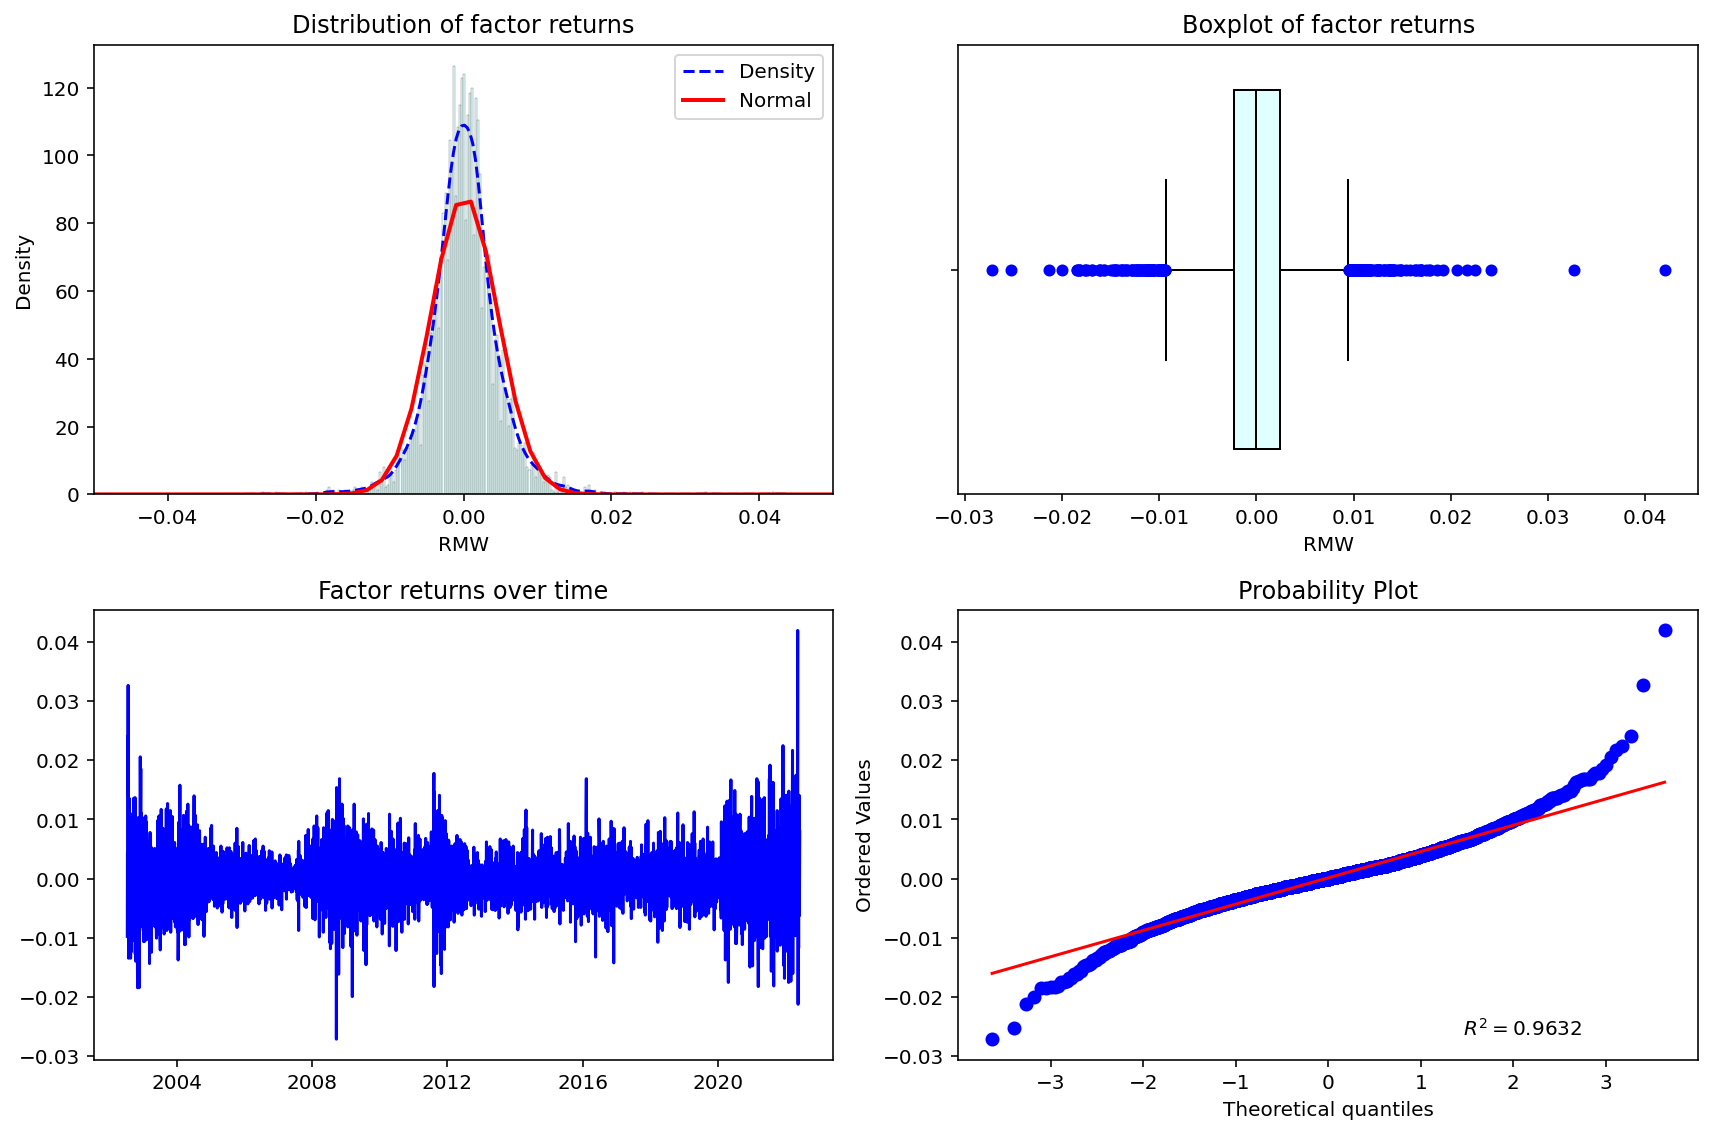

In [32]:
plot_factors(ff["RMW"])

#### 3.2.5 Conservative Minus Aggressive (2002-2022)

In [33]:
normal_test(ff["CMA"])

Skewness: 0.1610017584954924
Kurtosis: 3.5389618226440813
P-Value for JB-Test = 0.0


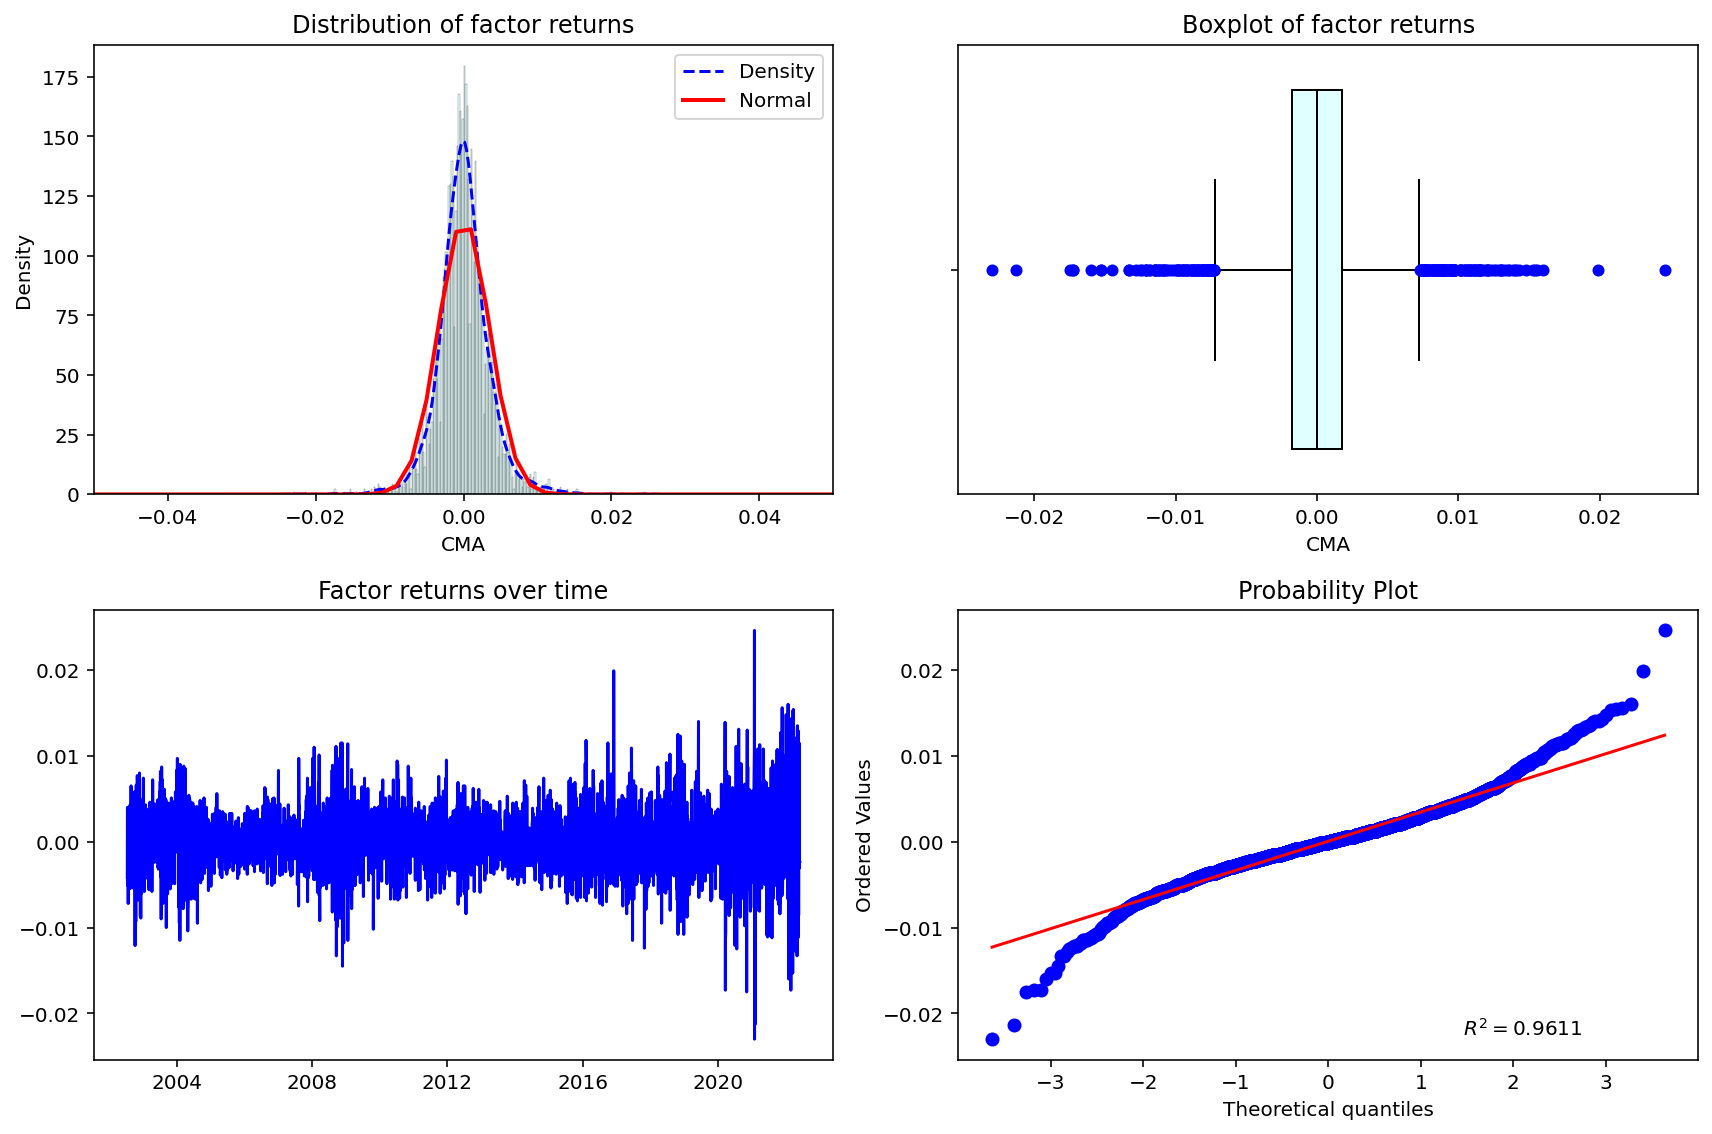

In [34]:
plot_factors(ff["CMA"])